In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
from clustering_comparison import *

Populating the interactive namespace from numpy and matplotlib


# Draft for Paper

## Introduction

Spectral imaging remains an unexplored imaging modality for multiple reasons. Firstly the price of spectral detectors is a large barrier to the clinical implementation. Secondly the applications where spectral imaging outdoes single energy and dual energy imaging are not well defined. Although there has been much interest in spectral CT in medicine it is often seen to have only small benefits as compared with dual energy CT in the same application. 

In this work we examine spectral imaging as compared to dual and single imaging in the application of segmentation. A comparison is made of the performance of unsupervised segmentation algorithms is performed on experimental images acquired using a Redlen (redlen industries ...) spectral detector on a phantom composed of a variety of materials as well as images aquired of these same materials embedded in chicken breast.

## Methods

### Data aquisition

X-ray scans were performed on a PMMA phantom with 5 contaminates (steel, glass, plastic, polypropylene, and PFTE) as well as chicken flesh with various contaminates (bone, cartilage, fat, plastic, wood, glass, rock, steel, and aluminum).

Data was acquired using a CZT detector with a 8$\times$12 mm imaging array from Redlen Technologies. The 330 $\mu$m pitch high-flux CZT detector is 2mm thick and is able to operate at 250 $\frac{Mcps}{mm^2}$ without any signs of polarization. Travel Heat Method (THM) was adopted by Redlen Technologies when growing the CZT crystals used in the detector. These crystals were placed in a sensor that is connected to a photon counting ASIC which operates at rates of up to 62.5 $\frac{Mcps}{channel}$. This ASIC communicates with an external PC though LVDS I/Os via a programmable FPGA. The energies of photons incident with the detector are sorted into six energy bins by the ASIC. In the case of this experiment the energy bins were set to 16-33 keV, 33-41 keV, 41-50 keV, 50-90 keV, 90-120 keV, \& 120< keV.

The detector and X-ray source were both mounted on vertical and horizontal linear motion stages from Newport Corporations. These stages were oriented perpendicular to each other to allow for easy navigation while imaging the phantom, which was mounted between these two stages. The X-ray source used was a module XRS-160 from Comet Technologies. 

The PMMA phantom block as imaged in figure (1.C) was placed on the stage and the 3 smallest contaminates of each material were imaged. To image these contaminates each at different heights, the CZT detector and X-ray source were moved vertically in a uniform manner allowing for each material to be centered without any motion of the phantom block itself. Following the first round of data acquisitions a second block of 18mm PMMA was placed in front of the phantom block and images were acquired to determine the depth at which each contaminate could be visualized. 

In the case of the chicken flesh, each contaminate was able to fit in a phantom holder alongside the chicken. This block was placed on the stage and was able to be imaged in one scan per contaminate. 

Air scans were completed for each data acquisition and could then be processed using MATLAB (The Mathworks, Natick, MA) for image reconstruction and CNR calculations for each contaminate. During all scans the X-ray tube was using a cone beam operating at 1mA, 120 kV, with a 1mm focal spot. 

### Data Analysis

The main steps required to analyze hyperspectral images include pre-processing of data, dimensionality reduction, enhancement of spectral responses, and component detection or classification (Mahesh et al., 2015). Using this as an analog for spectral imaging similar methods are applied in this study with the exception of enhancement of spectral response as the modelling the spectral response of the CZT detector is beyond the scope of this study.

#### Pre-processing of Data

After data aquisition, data pre-processing was performed using MATLAB_R2017b (The MathWorks, Natick, USA). The images were first cropped to remove the highly non-uniform edge pixels in some parts of the detector. Dead pixels were then found manually and replaced with NaN values in the image. These NaN values were then interpolated to be the average of the surrounding eight pixels. The images were then smoothed using a two dimensional gaussian filter with a standard deviation of 0.5 in an effort to reduce the noise in the image.

### Dimensional Reduction Methods

#### Principle Component Analysis

Dimensional reduction methods were applied in this work to increase class seperation and reduce noise in the data, methods were implemented in Python using sci-kit learn. Data reduction methods employed in this study were Principle Component Analysis (PCA). PCA does an eigenvalue decomposition of the covariance matrix, sorting the eigenvectors in terms of the magnitude of their eigenvalue one finds the directions of highest variance in the data. The data is then projected into a lower dimensional orhtogonal space defined by the eigenvectors with the most variance, in this case the data was reduced to two dimensions. This method results in a loss of information, however this loss of information is usually relatively small and ideally the discarded dimensions in the data amount to noise in the data. PCA can be seen in fig \ref{}. PCA is fast, linear and sees application in many domains.

#### Independant Component Analysis

Typically not used for dimension reduction but for blind source seperation, independant component analysis (ICA) is used for seperating a mixed signal into its constituent signals and is often used in audio analysis but has seen use in hyperspectral imaging \ref{}. Using ICA we frame the segmentation of the two images as a decomposition in which the image is a weighted addition of two signals, the background material (PMMA) and the contaminant. ICA aims to find the maximum 

The components $x_i$ of the images with 5 bins $\boldsymbol{x}=(x_1,\ldots,x_5)^T$ are seen to be a sum of the independent components $s_k$, $k=1,\ldots,5$:

$x_i = a_{i,1} s_1 + \cdots + a_{i,k} s_k + \cdots + a_{i,5} s_5$

where $a_{i,k}$ are the mixing weights.

Or in matrix form as $\boldsymbol{x}=\sum_{k=1}^{5} s_k \boldsymbol{a}_k$, where our image vectors $\boldsymbol{x}$ are represented by the basis vectors $\boldsymbol{a}_k=(\boldsymbol{a}_{1,k},\ldots,\boldsymbol{a}_{m,k})^T$. The basis vectors $\boldsymbol{a}_k$ form the columns of the mixing matrix $\boldsymbol{A}=(\boldsymbol{a}_1,\ldots,\boldsymbol{a}_5)$.

Putting all this together we have the matrix equation $\boldsymbol{x}=\boldsymbol{A} \boldsymbol{s}$, where $\boldsymbol{s}=(s_1,\ldots,s_5)^T$.

Given our images $\boldsymbol{x}_1,\ldots,\boldsymbol{x}_N$ of the random vector $\boldsymbol{x}$, the task is to estimate both the mixing matrix $\boldsymbol{A}$ and the sources $\boldsymbol{s}$. This is done by adaptively calculating the $\boldsymbol{w}$ vectors and setting up a cost function which maximizes the non-gaussianity of the calculated $s_k = \boldsymbol{w}^T \boldsymbol{x}$.

In this paper we use the maximum likelihood estimate (MLE) algorithm for finding the unmixing matrix $W$ 

'''[[Maximum likelihood]] estimation (MLE)''' is a standard statistical tool for finding parameter values (e.g. the unmixing matrix $\mathbf{W}$) that provide the best fit of some data (e.g., the extracted signals $y$) to a given a model (e.g., the assumed joint probability density function (pdf) $p_s$ of source signals).

The '''ML''' "model" includes a specification of a pdf, which in this case is the pdf $p_s$ of the unknown source signals $s$. Using '''ML ICA''', the objective is to find an unmixing matrix that yields extracted signals $y = \mathbf{W}x$ with a joint pdf as similar as possible to the joint pdf $p_s$ of the unknown source signals $s$.

'''MLE''' is thus based on the assumption that if the model pdf $p_s$ and the model parameters $\mathbf{A}$ are correct then a high probability should be obtained for the data $x$ that were actually observed. Conversely, if $\mathbf{A}$ is far from the correct parameter values then a low probability of the observed data would be expected.

Using '''MLE''', we call the probability of the observed data for a given set of model parameter values (e.g., a pdf $p_s$ and a matrix $\mathbf{A}$) the ''likelihood'' of the model parameter values given the observed data.

We define a ''likelihood'' function $\mathbf{L(W)}$ of $\mathbf{W}$:

$\mathbf{ L(W)} = p_s (\mathbf{W}x)|\det \mathbf{W}|. $

This equals to the probability density at $x$, since $s = \mathbf{W}x$.

Thus, if we wish to find a $\mathbf{W}$ that is most likely to have generated the observed mixtures $x$ from the unknown source signals $s$ with pdf $p_s$ then we need only find that $\mathbf{W}$ which maximizes the ''likelihood'' $\mathbf{L(W)}$. The unmixing matrix that maximizes equation is known as the '''MLE''' of the optimal unmixing matrix.

It is common practice to use the log ''likelihood'', because this is easier to evaluate. As the logarithm is a monotonic function, the $\mathbf{W}$ that maximizes the function $\mathbf{L(W)}$ also maximizes its logarithm $\ln \mathbf{L(W)}$. This allows us to take the logarithm of equation above, which yields the log ''likelihood'' function

$\ln \mathbf{L(W)} =\sum_{i}\sum_{t} \ln p_s(w^T_ix_t) + N\ln|\det \mathbf{W}|$

If we substitute a commonly used high-[[Kurtosis]] model pdf for the source signals $p_s = (1-\tanh(s)^2)$ then we have

$\ln \mathbf{L(W)} ={1 \over N}\sum_{i}^{M} \sum_{t}^{N}\ln(1-\tanh(w^T_i x_t )^2) + \ln |\det \mathbf{W}|$

This matrix $\mathbf{W}$ that maximizes this function is the MLE.

#### Non-negative Matrix Factorization

Let matrix $V$ be the product of the matrices $W$ and $H$,
:$\mathbf{V} = \mathbf{W} \mathbf{H} \,.$

Matrix multiplication can be implemented as computing the column vectors of $V$ as linear combinations of the column vectors in $W$ using coefficients supplied by columns of $H$.  That is, each column of $V$ can be computed as follows:
:$\mathbf{v}_i = \mathbf{W} \mathbf{h}_{i} \,,$

where $\mathbf{v}_i$ is the $i$-th column vector of the product matrix $V$ and $\mathbf{h}_{i}$ is the $i$-th column vector of the matrix $H$.

When multiplying matrices, the dimensions of the factor matrices may be significantly lower than those of the product matrix and it is this property that forms the basis of NMF. NMF generates factors with significantly reduced dimensions compared to the original matrix. For example, if $V$ is an $m × n$ matrix, $W$ is an $m × p$ matrix, and $H$ is a $p × n$ matrix then $p$ can be significantly less than both $m$ and $n$.

Here is an example based on a text-mining application: 
* Let the input matrix (the matrix to be factored) be $V$ with 10000 rows and 500 columns where words are in rows and documents are in columns. That is, we have 500 documents indexed by 10000 words. It follows that a column vector $v$ in $V$ represents a document.
* Assume we ask the algorithm to find 10 features in order to generate a ''features matrix'' $W$ with 10000 rows and 10 columns and a ''coefficients matrix'' $H$ with 10 rows and 500 columns.
* The product of $W$ and $H$ is a matrix with 10000 rows and 500 columns, the same shape as the input matrix $V$ and, if the factorization worked, it is a reasonable approximation to the input matrix $V$.
* From the treatment of matrix multiplication above it follows that each column in the product matrix $WH$ is a linear combination of the 10 column vectors in the features matrix $W$ with coefficients supplied by the coefficients matrix $H$.

This last point is the basis of NMF because we can consider each original document in our example as being built from a small set of hidden features. NMF generates these features.

It is useful to think of each feature (column vector) in the features matrix $W$ as a document archetype comprising a set of words where each word's cell value defines the word's rank in the feature: The higher a word's cell value the higher the word's rank in the feature. A column in the coefficients matrix $H$ represents an original document with a cell value defining the document's rank for a feature. We can now reconstruct a document (column vector) from our input matrix by a linear combination of our features (column vectors in $W$) where each feature is weighted by the feature's cell value from the document's column in $H$.

== Clustering property ==
NMF has an inherent clustering property,<ref name="DingSDM2005" /> i.e., it automatically clusters the columns of input data 
$\mathbf{V} = (v_1, \cdots, v_n) $.

More specifically, the approximation of $\mathbf{V}$ by
$\mathbf{V} \simeq \mathbf{W}\mathbf{H}$ is achieved by minimizing the error function

$ \min_{W,H} || V - WH ||_F,$ subject to $W \geq 0, H \geq 0.$

<code><!-- "If we add additional orthogonality constraint on $  H $ and $  W $ , 
i.e., $  W = H H^T $, then the above minimization is mathematically equivalent to the minimization of [[K-means clustering]]<ref>{{Cite book|url=http://epubs.siam.org/doi/abs/10.1137/1.9781611972757.70|title=Proceedings of the 2005 SIAM International Conference on Data Mining|last=Ding|first=C.|last2=He|first2=X.|last3=Simon|first3=H.|date=2005-04-21|publisher=Society for Industrial and Applied Mathematics|isbn=9780898715934|series=Proceedings|pages=606–610|doi=10.1137/1.9781611972757.70}}</ref> )." is false as HH^t is square and W is not! to this line should not be ekpt until it is fixed. I think it should be HH^t = I  --></code>

Furthermore, the computed $  H $ gives the cluster membership, i.e.,
if $\mathbf{H}_{kj} > \mathbf{H}_{ij} $ for all i ≠ k, this suggests that
the input data $ v_j $
belongs to $k^{th}$ cluster. 
The computed $W$ gives the cluster centroids, i.e., 
the $k^{th}$ column 
gives the cluster centroid of
$k^{th}$ cluster. This centroid's representation can be significantly enhanced by convex NMF.

When the orthogonality $  H H^T = I $ is not explicitly imposed, the orthogonality holds to a large extent, and the clustering property holds too. Clustering is the main objective of most [[data mining]] applications of NMF.{{citation needed|date=April 2015}}

When the error function to be used is [[Kullback–Leibler divergence]], NMF is identical to the [[Probabilistic latent semantic analysis]], a popular document clustering method.<ref>C Ding, T Li, W Peng, [http://users.cis.fiu.edu/~taoli/pub/NMFpLSIequiv.pdf " On the equivalence between non-negative matrix factorization and probabilistic latent semantic indexing"] Computational Statistics & Data Analysis 52, 3913-3927</ref>

## NMF plot

## ICA plot

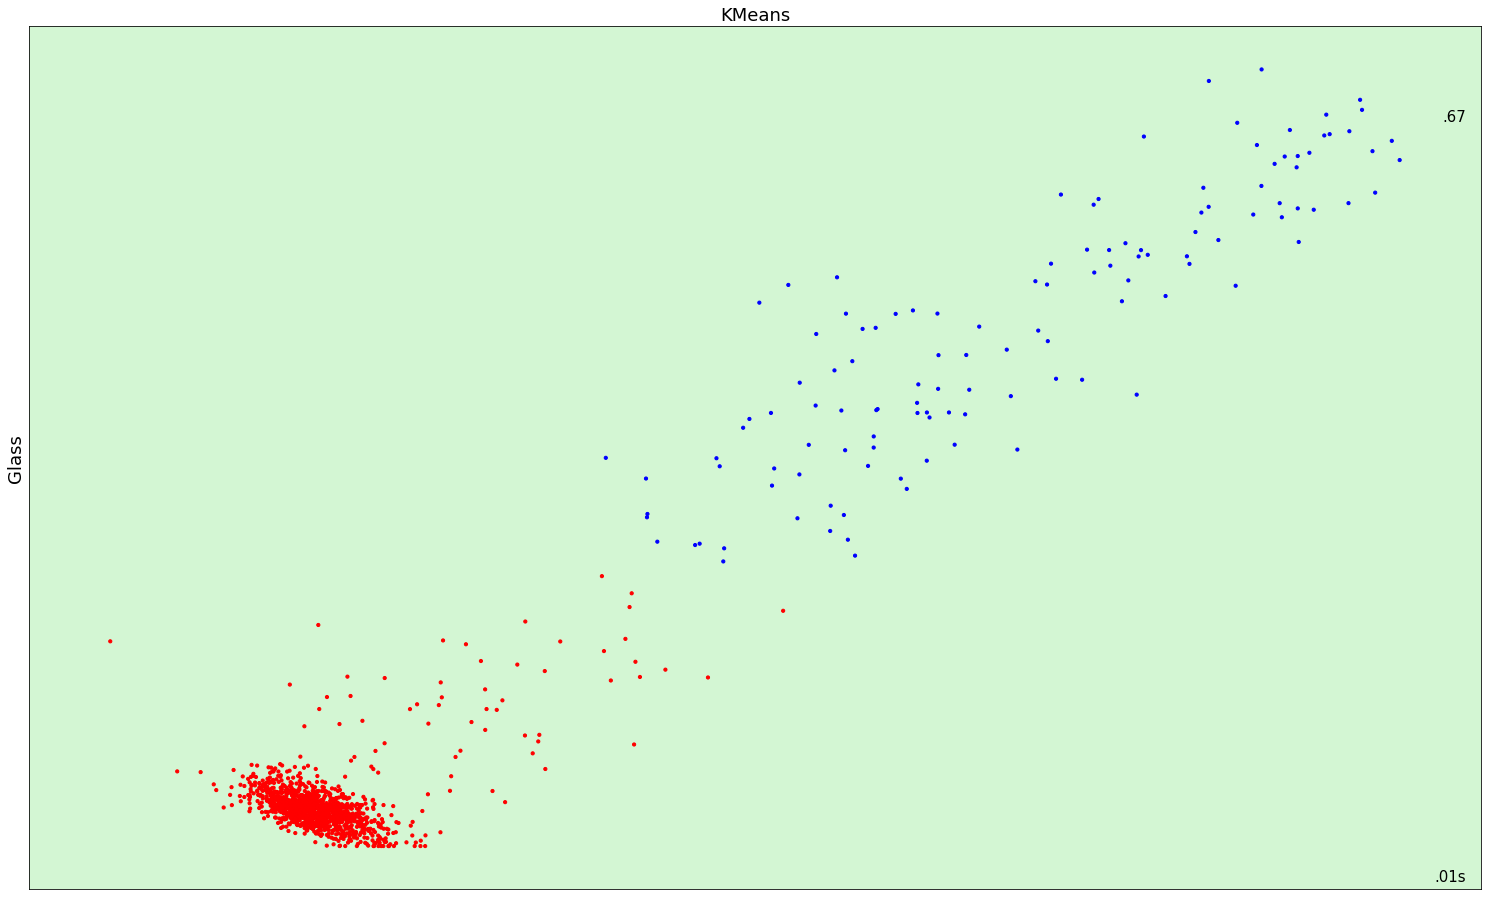

In [16]:
vs1 = plot_results(1,0,0,mode = 'all',cinds=[0],dinds=[0],red='nmf')

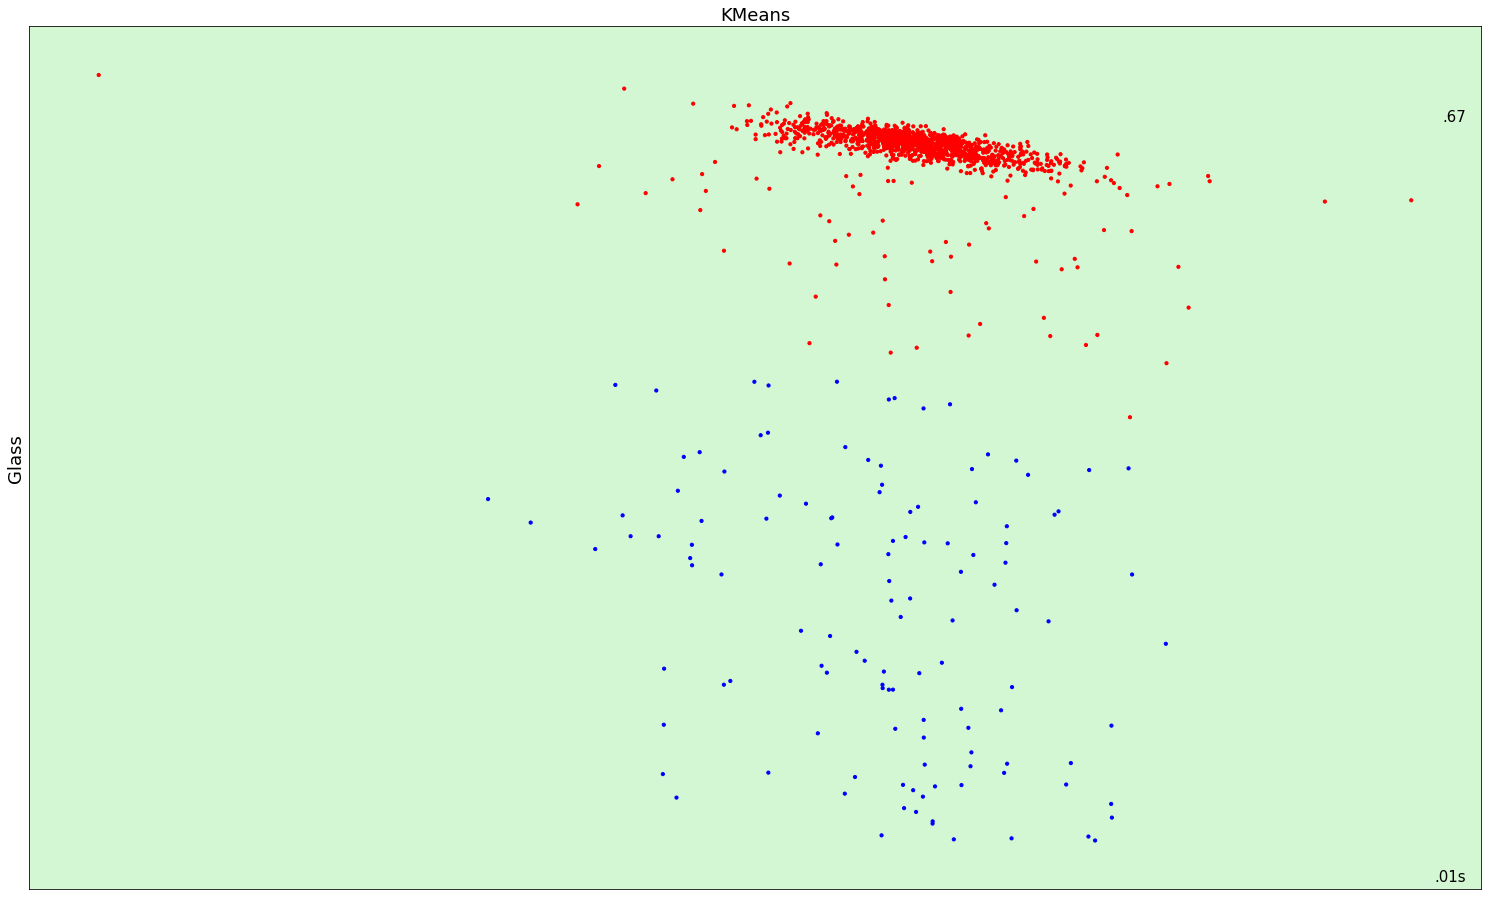

In [14]:
vs1 = plot_results(1,0,0,mode = 'all',cinds=[0],dinds=[0],red='ica')

## NMF plot

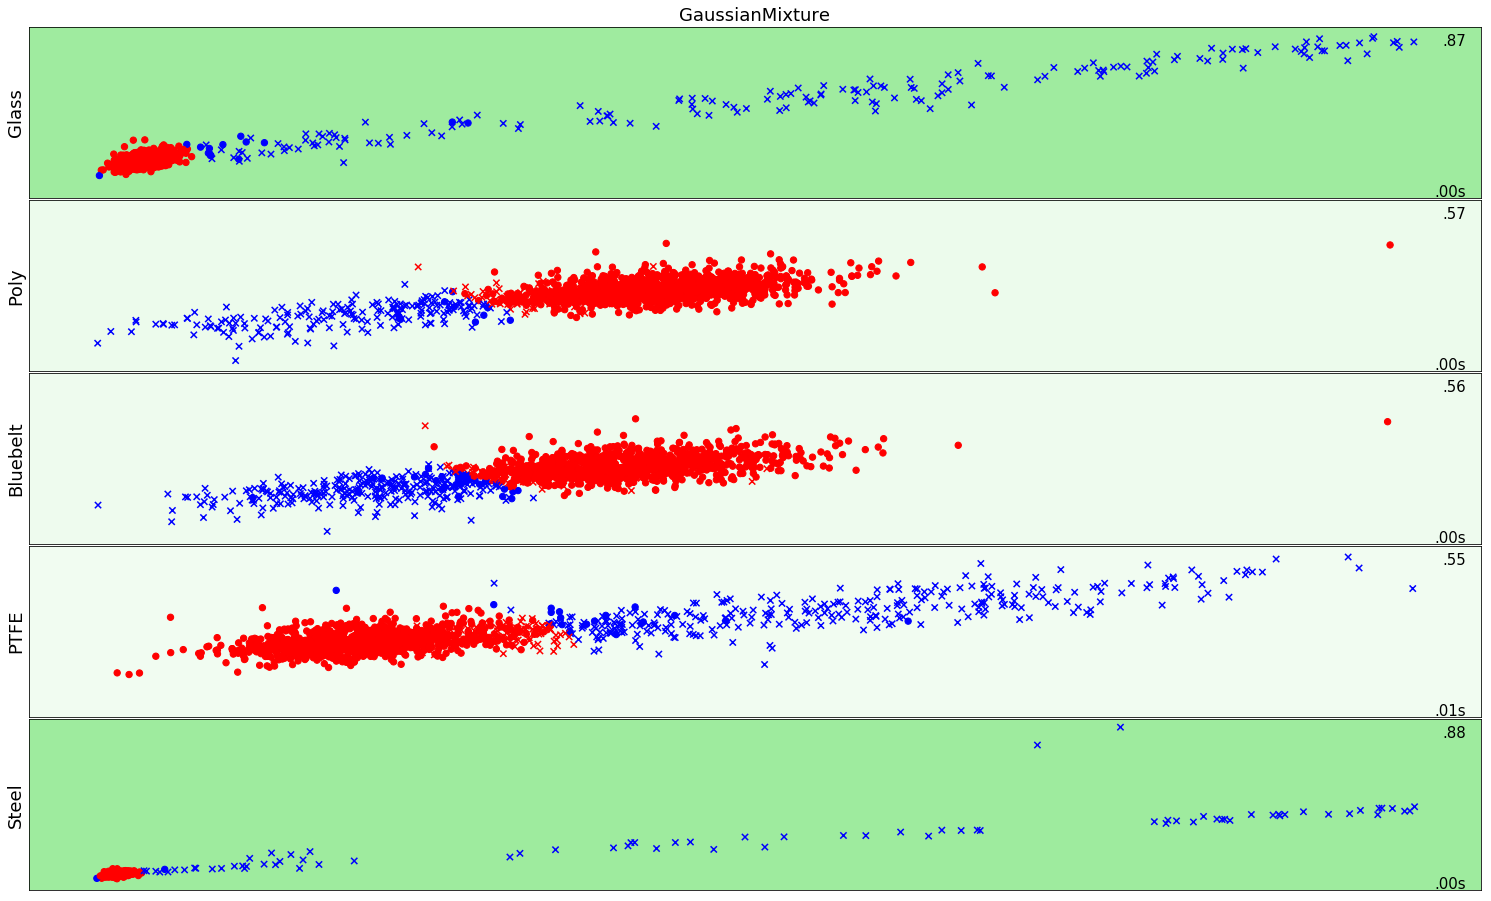

In [22]:
vs1 = plot_results(1,0,0,cinds=[9],mode='de')#,red='nmf')

## Clustering Methods

### K-means

The first clustering method implemented was k-means clustering. K-means was implemented using the k-means++ algorithm of (???). K-means was fit using a value for the number of clusters $k$ defined through the use of silhouette analysis. Different distance metrics were used, however none of the distance metrics tried improved performance over the squared euclidean distance, thus squared euclidean distance was used as the metric.

about k-means:

"K-Means is the 'go-to' clustering algorithm for many simply because it is fast, easy to understand, and available everywhere (there's an implementation in almost any statistical or machine learning tool you care to use). K-Means has a few problems however. The first is that it isn't a clustering algorithm, it is a partitioning algorithm. That is to say K-means doesn't 'find clusters' it partitions your dataset into as many (assumed to be globular) chunks as you ask for by attempting to minimize intra-partition distances. That leads to the second problem: you need to specify exactly how many clusters you expect. If you know a lot about your data then that is something you might expect to know. If, on the other hand, you are simply exploring a new dataset then 'number of clusters' is a hard parameter to have any good intuition for. The usually proposed solution is to run K-Means for many different 'number of clusters' values and score each clustering with some 'cluster goodness' measure (usually a variation on intra-cluster vs inter-cluster distances) and attempt to find an 'elbow'. If you've ever done this in practice you know that finding said elbow is usually not so easy, nor does it necessarily correlate as well with the actual 'natural' number of clusters as you might like. Finally K-Means is also dependent upon initialization; give it multiple different random starts and you can get multiple different clusterings. This does not engender much confidence in any individual clustering that may result."

### Mean Shift

"Mean shift is another option if you don't want to have to specify the number of clusters. It is centroid based, like K-Means and affinity propagation, but can return clusters instead of a partition. The underlying idea of the Mean Shift algorithm is that there exists some probability density function from which the data is drawn, and tries to place centroids of clusters at the maxima of that density function. It approximates this via kernel density estimation techniques, and the key parameter is then the bandwidth of the kernel used. This is easier to guess than the number of clusters, but may require some staring at, say, the distributions of pairwise distances between data points to choose successfully. The other issue (at least with the sklearn implementation) is that it is fairly slow depsite potentially having good scaling!"

In [ ]:
vs1 = plot_results(1,0,0,cinds=[0],dinds=[0])

## Results

### Figure 1